In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [13]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
# 이 부분 두개가 카테고리 데이터로 되어있어서 수치형으로 변환해주세요!
bostonDF['RAD'] = pd.to_numeric(bostonDF['RAD'], errors='coerce')
bostonDF['CHAS'] = pd.to_numeric(bostonDF['CHAS'], errors='coerce')
bostonDF['PRICE'] = boston.target

C:\Users\cndud\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:417: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(


In [14]:
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [15]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


##### regplot(): 산점도와 선형회귀 직선 표시

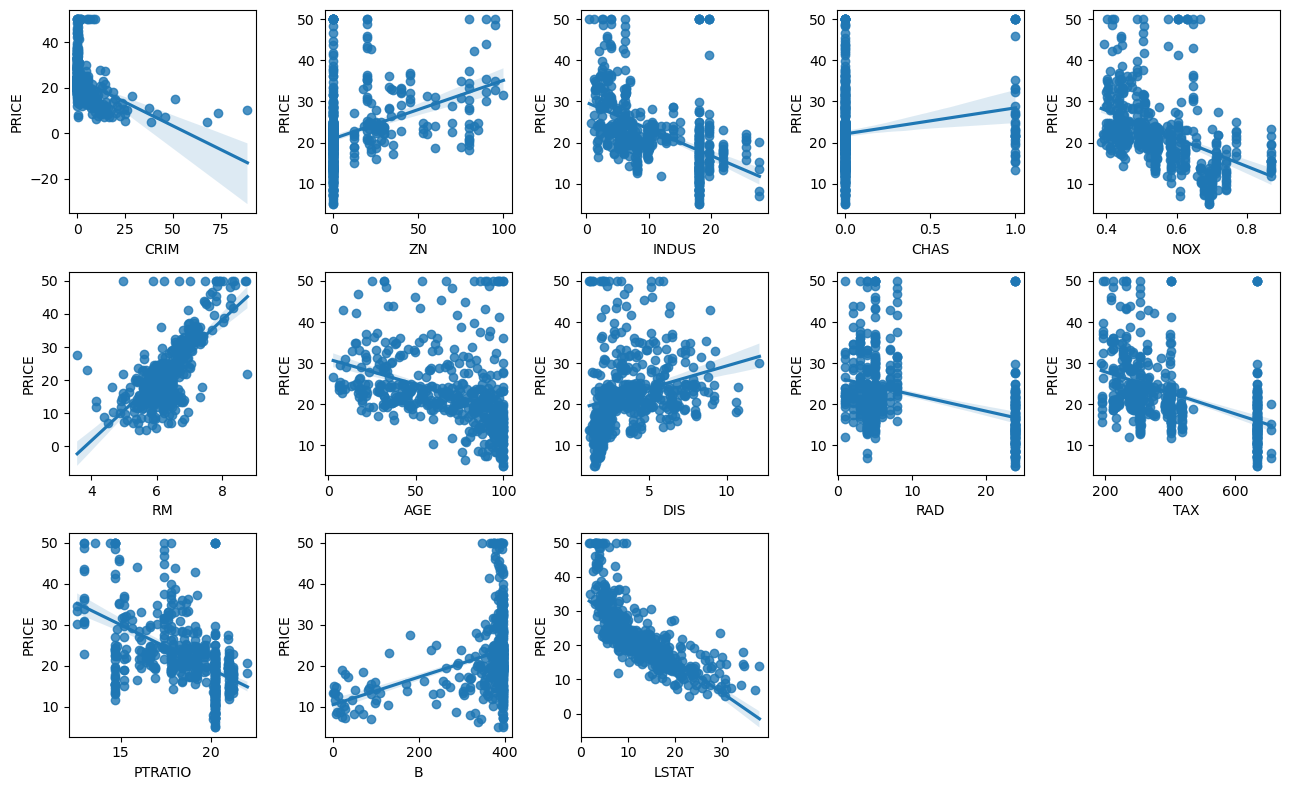

In [28]:
plt.figure(figsize=(13, 8))
for i, col in enumerate(bostonDF.columns[:-1], 1):
    plt.subplot(3, 5, i)
    sns.regplot(data=bostonDF, x=col, y='PRICE')
plt.tight_layout()
plt.show()

- RM이 PRICE와 양의 선형성(양의 상관관계) 정도가 가장 큼
- LSTAT이 PRICE와 음의 선형성(음의 상관관계) 정도가 가장 큼

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
X_data = bostonDF.drop('PRICE', axis=1)
y_target = bostonDF['PRICE']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [34]:
# MSE
mean_squared_error(y_test, pred)

17.296915907902047

In [36]:
# RMSE
np.sqrt(mean_squared_error(y_test, pred))

4.158956107955703

In [37]:
# R2
r2_score(y_test, pred)

0.7572263323138937

In [41]:
print(f'절편 값: {lr.intercept_}\n회귀계수: {np.round(lr.coef_, 1)}')

절편 값: 40.99559517216444
회귀계수: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [45]:
# 회귀계수 큰 순서대로 정렬
pd.Series(lr.coef_, index=X_train.columns).sort_values(ascending=False)

RM          3.354969
CHAS        3.045898
RAD         0.355884
ZN          0.065512
INDUS       0.034437
B           0.010397
AGE         0.005937
TAX        -0.014295
CRIM       -0.112980
LSTAT      -0.566182
PTRATIO    -0.920180
DIS        -1.741854
NOX       -19.795832
dtype: float64

In [48]:
from sklearn.model_selection import cross_val_score

In [52]:
neg_mse_scores = cross_val_score(lr, X_data, y_target, cv=5, scoring='neg_mean_squared_error')
neg_mse_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [53]:
rmse_scores = np.sqrt(-neg_mse_scores)
rmse_scores

array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405])

In [55]:
avg_rmse = rmse_scores.mean()
avg_rmse

5.828658946215802

### 다항회귀

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
X = np.arange(4).reshape(2, -1)
print(f'일차 단항식 계수 피처:\n{X}')

일차 단항식 계수 피처:
[[0 1]
 [2 3]]


In [59]:
# degree 2인 2차 다항식
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print(f'변환된 2차 다항식 계수 피처:\n{poly_ftr}')

변환된 2차 다항식 계수 피처:
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [60]:
# 3차 다항회귀 함수식
def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

In [63]:
X = np.arange(4).reshape(2, -1)
print('일차 단항식 계수 피처:')
print(X)
y = polynomial_func(X)
print('삼차 다항식 결정값:')
print(y)

일차 단항식 계수 피처:
[[0 1]
 [2 3]]
삼차 다항식 결정값:
[  5 125]


In [64]:
# degree 3인 3차 다항식
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 피처:')
print(poly_ftr)

3차 다항식 계수 피처:
[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [70]:
# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀계수')
print(model.coef_)
print('Polynomial 회귀 Shape')
print(model.coef_.shape)

Polynomial 회귀계수
[0.         0.18018018 0.18018018 0.36036036 0.54054054 0.72072072
 0.72072072 1.08108108 1.62162162 2.34234234]
Polynomial 회귀 Shape
(10,)


In [73]:
from sklearn.pipeline import Pipeline

In [76]:
# pipeline 이용해 피쳐 변환과 선형 회귀 적용 한 번에
def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                                 ('linear', LinearRegression())])

X = np.arange(4).reshape(2, -1)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀계수')
print(model.named_steps['linear'].coef_)

Polynomial 회귀계수
[0.         0.18018018 0.18018018 0.36036036 0.54054054 0.72072072
 0.72072072 1.08108108 1.62162162 2.34234234]


### 다항회귀 이용한 과소적합 및 과적합 이해

In [ ]:
def true_fun(X):
    return np.cos(1.5*np.pi * X)



### 릿지 회귀

In [77]:
from sklearn.linear_model import Ridge

In [78]:
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-neg_mse_scores)
avg_rmse = rmse_scores.mean()

In [79]:
avg_rmse

5.51816628086897

In [ ]:
alpha = [0, 0.1, 1, 10, 100]